In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [7]:
# For reproducibility
tf.random.set_seed(42)

In [9]:
# Load the dataset.
# Make sure you have the SMS Spam Collection CSV file in your working directory.
# The dataset should have columns like "label" and "message".
data = pd.read_csv(r"C:/Users/HP 840 G3/Downloads/spam.csv", encoding='latin-1')

In [12]:
# Inspect the first few rows.
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [18]:
# Convert labels to binary: spam = 1, ham = 0.
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Optional: Basic text cleaning
def clean_text(text):
    text = text.lower()
    return text

data['clean_message'] = data.message.apply(clean_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data.clean_message, data.label_num, test_size=0.2, random_state=42)


In [21]:
# Create a TextVectorization layer to tokenize and vectorize the text.
max_features = 10000  # Maximum vocabulary size.
sequence_length = 100  # Maximum sequence length.

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# Adapt the vectorization layer on training text.
vectorize_layer.adapt(X_train.values)

# Convert text data to integer sequences.
X_train_vectorized = vectorize_layer(X_train.values)
X_test_vectorized = vectorize_layer(X_test.values)

In [ ]:
# Build the model.
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=64, input_length=sequence_length),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# Train the model.
history = model.fit(X_train_vectorized, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)
model.summary()

C:\Users\HP 840 G3\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 93ms/step - accuracy: 0.8693 - loss: 0.3697 - val_accuracy: 0.9787 - val_loss: 0.0665
Epoch 2/5


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9826 - loss: 0.1179
Test Accuracy: 0.9803


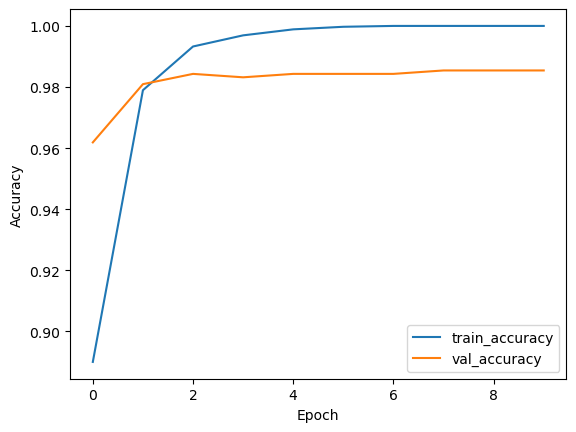

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [54]:
# Evaluate the model on the test set.
test_loss, test_acc = model.evaluate(X_test_vectorized, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training and validation accuracy.
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get predictions and print classification report.
y_pred = (model.predict(X_test_vectorized) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
